In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

json = pd.read_json ('https://pomber.github.io/covid19/timeseries.json')

In [2]:
def plot_country(country):
    df = pd.json_normalize(json[country])
    diff = df[['confirmed']].diff()[1:]
    df = df[1:]
    discharged = df.recovered+df.deaths
    hospitalized = df.confirmed - discharged
    
    print(df.tail(1).to_string(index=False))
    print('new',diff.tail(1).to_string(index=False))

    plt.figure(figsize=(8,4))
    plt.plot(df.confirmed,label='confirmed')
    plt.plot(df.recovered,c='g',label='recovered')
    plt.plot(df.deaths,c='r',label='deaths')
    plt.plot(discharged,dashes=[2,2,6, 2],c='y',label='discharged')
    plt.plot(hospitalized,dashes=[2,2,6, 2],c='b',label='hospitalized')
    plt.title(country)
    plt.xlabel('day')
    plt.legend(loc='upper left')
    plt.show()
    
    plt.figure(figsize=(8,4))
    plt.scatter(df.confirmed,diff.confirmed)
    model = np.poly1d(np.polyfit(df.confirmed, diff.confirmed, 3))
    xp = np.linspace(df.confirmed.min(), df.confirmed.max(), 100)
    plt.plot(xp, model(xp), c='r')
    plt.title(country)
    plt.xlabel('confirmed')
    plt.ylabel('new confirmed per day')
    plt.show()
    
    print('discharged: ',discharged.iloc[-1])
    print('deaths: ',df.deaths.iloc[-1])
    print('%: ',(df.deaths.iloc[-1]/discharged.iloc[-1]*100))

    plt.figure(figsize=(8,4))
    plt.scatter(df.recovered+df.deaths,df.deaths)
    plt.title(country)
    plt.xlabel('discharged')
    plt.ylabel('deaths')
    plt.show()


In [3]:
# for c in json.columns:
#     print(c)

      date  confirmed  deaths  recovered
 2020-4-19       2765      47       1928
new  confirmed
      32.0


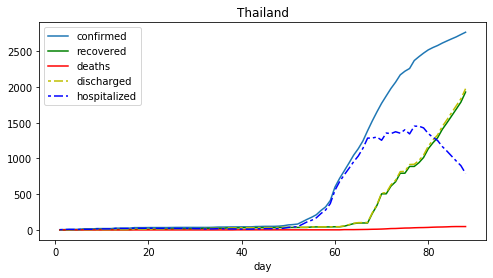

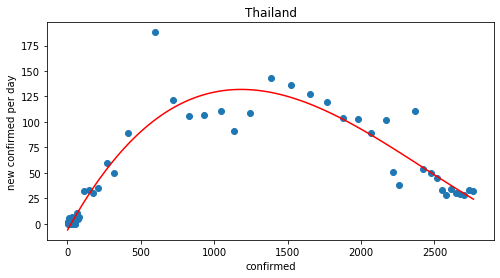

discharged:  1975
deaths:  47
%:  2.3797468354430378


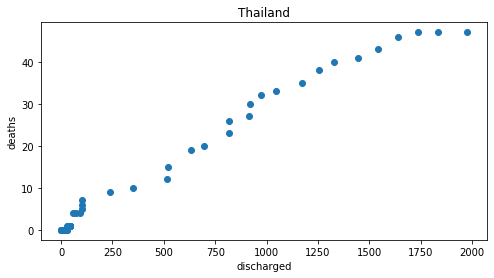

      date  confirmed  deaths  recovered
 2020-4-19       5389      89       3197
new  confirmed
      84.0


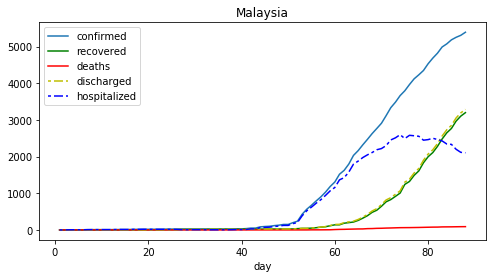

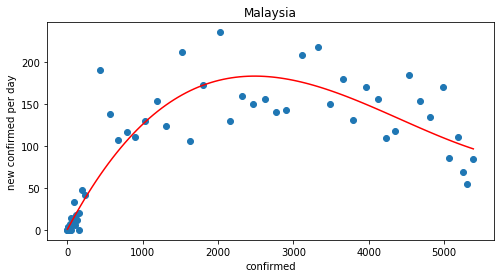

discharged:  3286
deaths:  89
%:  2.7084601339014


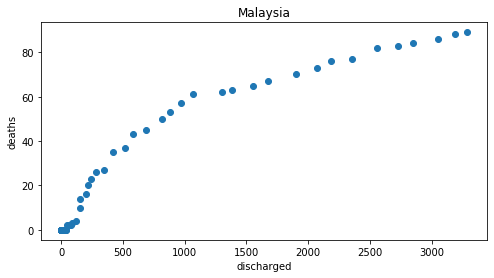

      date  confirmed  deaths  recovered
 2020-4-19       6588      11        768
new  confirmed
     596.0


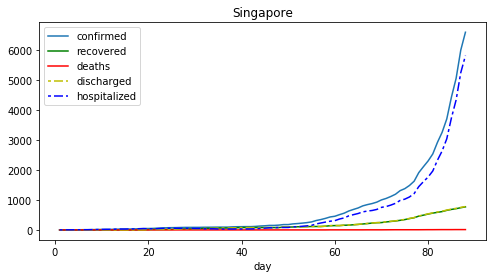

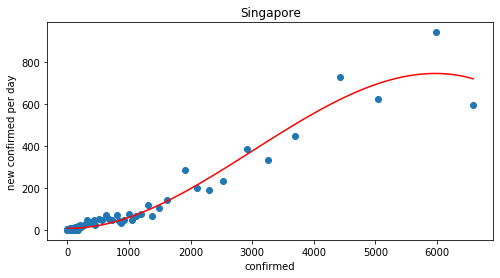

discharged:  779
deaths:  11
%:  1.4120667522464698


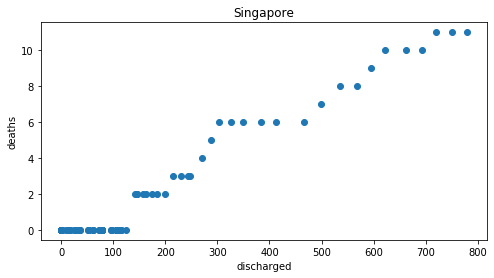

      date  confirmed  deaths  recovered
 2020-4-19       6575     582        686
new  confirmed
     327.0


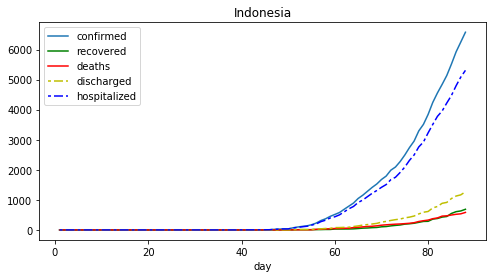

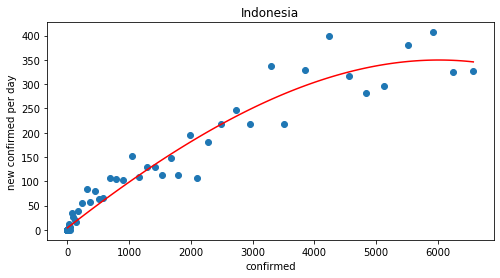

discharged:  1268
deaths:  582
%:  45.89905362776025


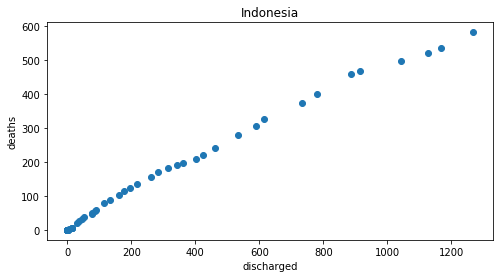

      date  confirmed  deaths  recovered
 2020-4-19     759086   40661      70337
new  confirmed
   26889.0


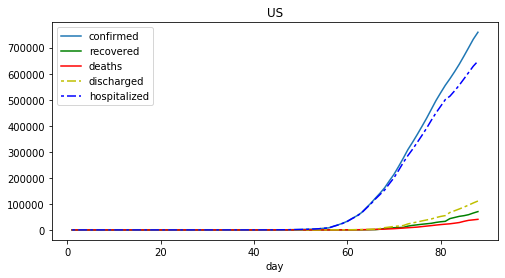

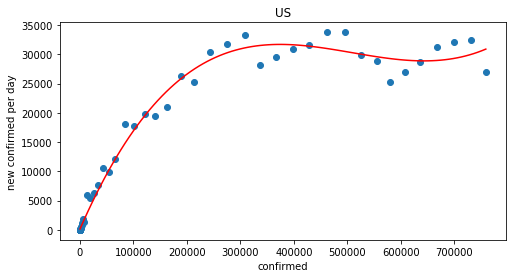

discharged:  110998
deaths:  40661
%:  36.6321915710193


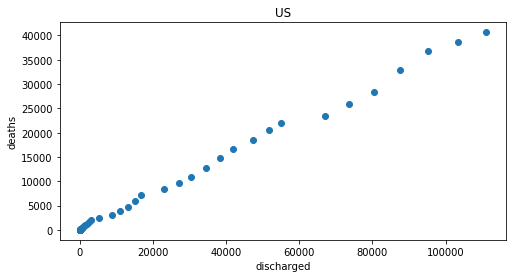

      date  confirmed  deaths  recovered
 2020-4-19      83805    4636      77690
new  confirmed
      18.0


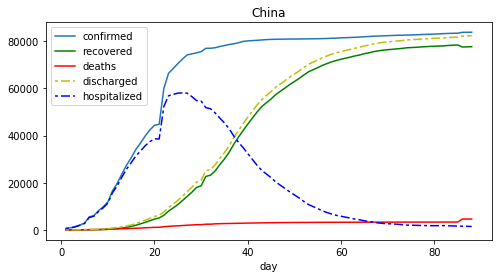

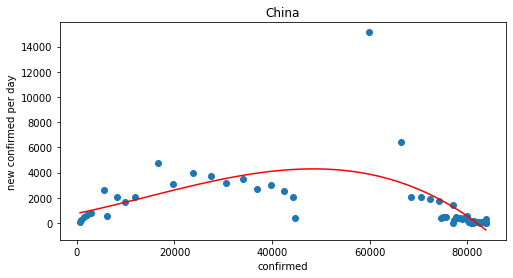

discharged:  82326
deaths:  4636
%:  5.6312708014479025


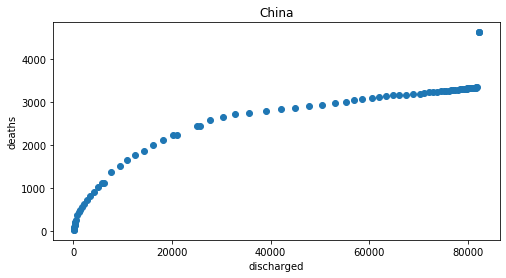

      date  confirmed  deaths  recovered
 2020-4-19      10661     234       8042
new  confirmed
       8.0


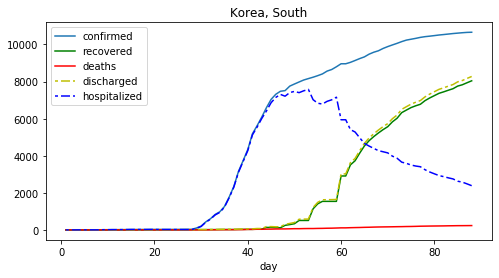

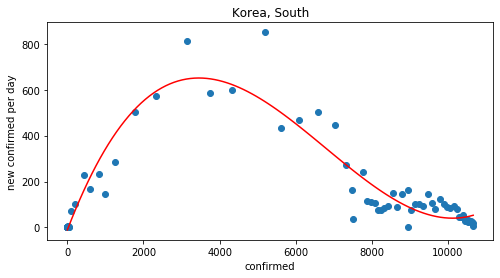

discharged:  8276
deaths:  234
%:  2.827452875785404


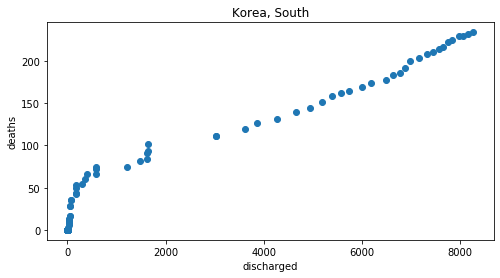

      date  confirmed  deaths  recovered
 2020-4-19     178972   23660      47055
new  confirmed
    3047.0


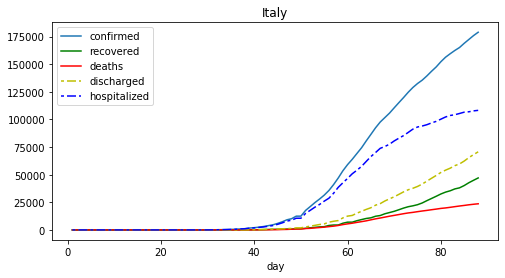

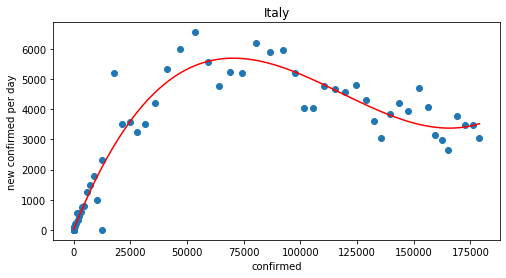

discharged:  70715
deaths:  23660
%:  33.458247896485894


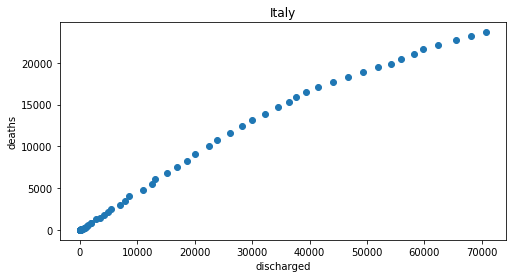

      date  confirmed  deaths  recovered
 2020-4-19     198674   20453      77357
new  confirmed
    6948.0


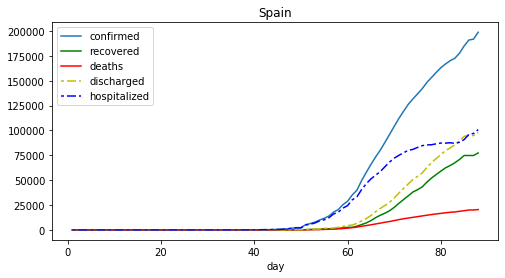

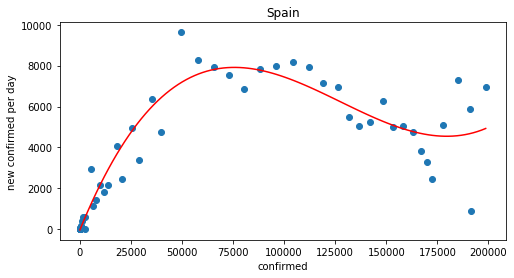

discharged:  97810
deaths:  20453
%:  20.910949800633883


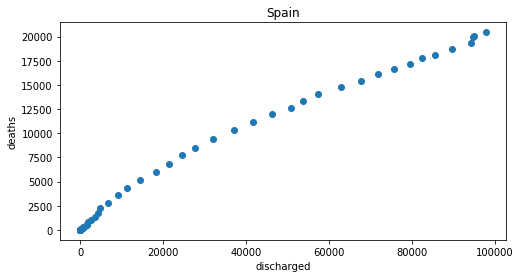

In [4]:
for c in ['Thailand','Malaysia','Singapore','Indonesia','US','China','Korea, South','Italy','Spain']:
    plot_country(c)
